In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Step 1 : Setting, Getting Price Data, and Preprocessing
###Extract a list of unique tickers.
It' have been included in the SP500 index at least once since December 2013.  
(But, we still have factors of only current SP500 tickers. It need to be improved.)  
###Download the daily price of unique tickers and SPX
Among the 754 companies, 114 companies still cannot be brought in due to reasons such as delisting.

In [4]:
unique_tickers = pd.read_excel('sample_data/unique_ticker_list_754.xlsx', index_col=0).set_index('unique_ticker')['Ticker_Code'].to_frame()
historical_tickers = pd.read_excel('sample_data/spx_composition_history_since201312.xlsx', index_col=0)
unique_tickers.index = unique_tickers.index.str.replace('/', '-')
unique_tickers['Ticker_Code'] = unique_tickers['Ticker_Code'].str.replace('/', '.')

# Download the daily price of unique tickers and SPX
daily_price = yf.download(list(unique_tickers['Ticker_Code']), start="2014-01-01", end="2024-07-01", interval='1d')['Adj Close']
spx = yf.download("^GSPC", start="2014-01-01", end="2024-07-01", interval='1d')['Adj Close']
daily_price.index = daily_price.index.tz_localize(None)

# Cleansing(remove ticker that all price is None)
daily_price_cleaned = daily_price.dropna(axis=1, how='all')
daily_price_cleaned.head(10)


# Result
# 114 Failed downloads:
# ['FTRCQ', 'WINMQ', '1431816D', '2078185D', 'HFC', 'DISCK', '1541931D', 'WCG', '1858968D', '2326248D', 'CELG', 'XEC', '1806854D', 'CERN', '1448062D', 'TFCFA', 'WRK', '2258717D', 'BF/B', 'INFO', 'ALXN', 'APC', 'AGN', 'VALPQ', '1697067D', '1752754D', '1518855D', 'NLSN', '9876566D', 'TWTR', 'MNKKQ', '2370058D', 'DISCA', 'DNRCQ', '1922150D', 'ATVI', '9876544D', 'CXO', '1566019D', 'XLNX', 'BBBYQ', 'ETFC', '1831877D', '1436513D', 'RTN', '9980328D', '1284849D', 'MYL', 'WPX', 'RHT', '9990213D', 'MXIM', 'LM', '1684442D', '1539941D', '1255459D', '1715651D', 'CTXS', '9876549D', '1927294D', 'FLIR', 'KSU', 'NEBLQ', 'AVP', 'BRK/B', 'TSS', 'CHKAQ', 'DOFSQ', 'ENDPQ', 'DISH', 'PBCT', 'QEP', '1500785D', 'PXD', 'TFCF', '1856613D', 'VAR', 'RDC', '1288453D', 'VIAB', 'NBL', 'DRE', 'ABMD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
# ['BCR', 'BRCM', 'MJN', 'SWY', 'WFM', 'JOY', 'CMCSK', 'FDO', 'GMCR', 'BTUUQ', 'HCBK', 'STJ', 'KRFT', 'SPLS', 'SNDK', 'LLTC', 'ARG', 'CFN', 'LVLT', 'SIAL', 'MWV', 'LO', 'GGP', 'RAI', 'CVC', 'HSP', 'BXLT', 'TWC', 'CPGX', 'CAM']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-07-01)')
# ['SBNY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-07-01) (Yahoo error = "Data doesn\'t exist for startDate = 1388552400, endDate = 1719806400")')


[*********************100%***********************]  723 of 723 completed
ERROR:yfinance:
114 Failed downloads:
ERROR:yfinance:['BRK.B', '1927294D', 'CERN', '1684442D', 'NEBLQ', 'WPX', 'NBL', 'FTRCQ', 'TFCFA', 'INFO', '1448062D', '1715651D', 'PBCT', '1541931D', '1288453D', 'ENDPQ', '1858968D', 'PXD', '9876566D', 'AVP', 'LM', 'AGN', '9990213D', 'TWTR', 'CELG', 'DNRCQ', 'TFCF', 'CHKAQ', '1566019D', '1431816D', 'VALPQ', 'WINMQ', 'APC', '1697067D', '9876549D', '9876544D', '1255459D', 'CXO', 'MNKKQ', '2326248D', 'RTN', 'ATVI', 'TSS', 'CTXS', '2370058D', 'DRE', '1436513D', '1752754D', '9980328D', '1922150D', 'KSU', '2258717D', 'WRK', '1856613D', 'RDC', 'XEC', 'BBBYQ', '2078185D', 'DISCK', 'VAR', 'XLNX', '1284849D', 'ALXN', 'DISH', 'RHT', '1500785D', 'FLIR', '1831877D', '1806854D', 'QEP', '1518855D', 'ABMD', 'DOFSQ', 'DISCA', 'MXIM', 'ETFC', 'MYL', 'WCG', 'NLSN', '1539941D', 'VIAB', 'HFC']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['STJ', 'CAM', 'MWV',

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,36.805550,23.744682,23.907925,99.200760,17.253260,33.557152,NaN,31.049803,19.123333,67.322578,...,19.504490,63.254997,43.370071,17.801956,29.760412,43.971447,82.349106,53.180000,23.147999,29.901386
2014-01-03,37.270451,23.834875,25.020357,102.039246,16.874279,33.763741,NaN,31.382801,18.756666,67.546631,...,19.497396,63.102806,43.578033,17.921530,30.030485,44.246677,82.706207,53.580002,23.311949,29.614935
2014-01-06,37.087101,23.744682,25.482307,101.062958,16.966288,32.530682,NaN,31.797020,18.580000,66.832985,...,19.391052,63.197906,43.315804,18.071005,29.978210,44.211540,83.241867,53.400002,23.147999,29.550247
2014-01-07,37.617485,23.767227,25.369175,102.310410,16.844954,32.595242,NaN,31.553356,18.586666,67.646194,...,19.724281,64.092041,43.984985,18.220476,30.065346,44.832241,84.902412,53.950001,23.218266,29.661131
2014-01-08,38.232979,24.421164,26.047945,101.514954,16.951635,32.511326,NaN,31.837622,18.476667,68.168983,...,19.646294,63.882786,44.066376,18.056063,30.047915,44.814678,86.982582,53.910000,23.421249,29.328482
2014-01-09,38.246078,24.105473,27.735455,102.644897,16.735155,33.066517,NaN,31.894472,18.643333,68.832832,...,19.724281,63.261333,44.229141,18.011219,30.169874,43.948025,86.125504,54.160000,23.593002,29.531767
2014-01-10,38.586552,22.797598,27.669460,104.534157,16.623493,32.859936,NaN,32.138126,18.536667,69.040276,...,20.029150,63.743275,44.265320,17.921530,30.413815,43.930458,86.312996,54.279999,23.468092,30.067698
2014-01-13,38.586552,22.775049,27.009542,103.313812,16.710516,32.423969,NaN,31.942118,18.379999,67.264481,...,19.880257,62.494038,43.686554,18.250376,30.509642,42.987671,85.393463,53.660000,23.147999,29.365446
2014-01-14,39.208611,23.271141,27.216946,106.305962,17.043018,32.924995,NaN,32.317806,18.490000,68.003029,...,19.936979,62.855465,44.066376,18.325108,30.997526,42.882271,86.420135,54.599998,23.163610,29.430132


### Resample daily data to weekly data.
The results are not much different.

In [5]:
# Get Weekly Data
weekly_price = daily_price_cleaned.resample('W-FRI').last()
weekly_spx = spx.resample('W-FRI').last().to_frame('SP500')

In [6]:
weekly_price.head(5)

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABNB,ABT,ACGL,ACN,...,XEL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,37.270451,23.834875,25.020357,102.039246,16.874279,33.763741,NaN,31.382801,18.756666,67.546631,...,19.497396,63.102806,43.578033,17.921530,30.030485,44.246677,82.706207,53.580002,23.311949,29.614935
2014-01-10,38.586552,22.797598,27.669460,104.534157,16.623493,32.859936,NaN,32.138126,18.536667,69.040276,...,20.029150,63.743275,44.265320,17.921530,30.413815,43.930458,86.312996,54.279999,23.468092,30.067698
2014-01-17,39.752094,25.616291,28.301098,107.065254,16.864603,32.573643,NaN,32.178963,18.213333,70.060944,...,19.993698,62.880829,43.315804,18.235428,31.860020,42.434956,85.643425,53.869999,23.546164,29.319244
2014-01-24,37.892494,25.796690,28.659336,104.841515,17.033041,31.096550,NaN,29.875797,17.870001,67.364052,...,19.894432,60.147713,41.452942,16.800507,29.342230,40.504490,83.348991,53.080002,23.600805,29.069752
2014-01-31,38.075825,25.954540,31.628973,103.783867,15.614738,32.033546,NaN,29.941132,17.936666,66.285301,...,20.497082,58.441906,41.724243,16.217571,29.063440,39.521603,83.893593,54.959999,22.445358,28.117893


# Step 2: Get Factors from Peter's data
Only the factors of the current SP500 exist here, and getting the factors of the historical SP500(=unique_tickers(754)) is an additional task.  
Due to Bloomberg's criteria, the actual stock buyback amount uses the CF_DECR_CAP_STOCK field.

### TODO : Get the Factors of unique_tickers(754)


In [9]:
factors = pd.read_excel("sample_data/peters.xlsx",index_col=0, header=[0, 1])
factors = factors[:-2].copy()
factors = factors.loc[factors.index >= '2013-12-01']

# modify factor
factor_1 = factors.xs('CF_DECR_CAP_STOCK', level=1, axis=1) / factors.xs('CF_DVD_PAID', level=1, axis=1)
factor_2 = factors.xs('CF_DECR_CAP_STOCK', level=1, axis=1) - factors.xs('CF_DVD_PAID', level=1, axis=1)

for first_level in factors.columns.get_level_values(0).unique():
    factors[(first_level, 'Buyback/Cashdividend')] = factor_1[first_level]
for first_level in factors.columns.get_level_values(0).unique():
    factors[(first_level, 'Buyback-Cashdividend')] = factor_2[first_level]
factors_sorted = factors.sort_index(axis=1, level=0)
factors_sorted.to_excel("New_factors.xlsx")
factors_sorted.head(5)

A UN Equity                                         \
Dates      Buyback-Cashdividend Buyback/Cashdividend CF_DECR_CAP_STOCK   
2013-12-31                -56.0             2.272727            -100.0   
2014-03-31                 -6.0             1.136364             -50.0   
2014-06-30                 -6.0             1.136364             -50.0   
2014-09-30                 44.0            -0.000000               0.0   
2014-12-31                 28.0             0.176471              -6.0   

                                                                       \
Dates      CF_DVD_PAID DVD_PAYOUT_RATIO PROC_FR_REPURCH_EQTY_DETAILED   
2013-12-31       -44.0          36.3273                         -24.0   
2014-03-31       -44.0         109.8900                         -28.0   
2014-06-30       -44.0          69.9810                          -9.0   
2014-09-30       -44.0          69.9810                          50.0   
2014-12-31       -34.0          36.1290                           2.0   

                          AAPL UW Equity                       \
Dates       PX_LAST Buyback-Cashdividend Buyback/Cashdividend   
2013-12-31  40.8958              -2260.0             1.816179   
2014-03-31  39.9877             -15310.0             6.753476   
2014-06-30  41.0746              -2133.0             1.743983   
2014-09-30  40.7457             -14171.0             6.009191   
2014-12-31  40.9400              -2229.0             1.795787   

                              ...   ZBRA UW Equity  \
Dates      CF_DECR_CAP_STOCK  ... DVD_PAYOUT_RATIO   
2013-12-31           -5029.0  ...              0.0   
2014-03-31          -17971.0  ...              0.0   
2014-06-30           -5000.0  ...              0.0   
2014-09-30          -17000.0  ...              0.0   
2014-12-31           -5030.0  ...              0.0   

                                                        ZTS UN Equity  \
Dates      PROC_FR_REPURCH_EQTY_DETAILED PX_LAST Buyback-Cashdividend   
2013-12-31                         3.646   54.08                 33.0   
2014-03-31                         5.331   69.41                 36.0   
2014-06-30                         6.327   82.32                 37.0   
2014-09-30                         6.085   70.97                 36.0   
2014-12-31                        14.257   77.41                 37.0   

                                                               \
Dates      Buyback/Cashdividend CF_DECR_CAP_STOCK CF_DVD_PAID   
2013-12-31                 -0.0               0.0       -33.0   
2014-03-31                 -0.0               0.0       -36.0   
2014-06-30                 -0.0               0.0       -37.0   
2014-09-30                 -0.0               0.0       -36.0   
2014-12-31                 -0.0               0.0       -37.0   

                                                                   
Dates      DVD_PAYOUT_RATIO PROC_FR_REPURCH_EQTY_DETAILED PX_LAST  
2013-12-31          30.9528                           0.0   32.69  
2014-03-31          23.2258                           0.0   28.94  
2014-06-30           0.0000                           1.0   32.27  
2014-09-30          21.6867                           1.0   36.95  
2014-12-31          28.6606                           0.0   43.03  

[5 rows x 3521 columns]

#Step3 : Define Sub-Strategies

###Issue
Initially, we considered Buyback/CashDividend Ratio as a factor of strategy.  
but, there are many companies where CashDividend is 0 and the calculation results are infinite.  
In this case, we have no choice but to exclude the company and may not get the company we want.  
Therefore, we backtested the comparison sub-strategies between Buyback and CashDividend as follows.  

---
Case1) Cash Dividend    0, Buyback    0, So, Factor = Nan       
Case2) Cash Dividend    0, Buyback -100, So,Factor = -infinite   
Case3) Cash Dividend -100, Buyback    0, So,Factor = 0         
Case4) Cash Dividend -100, Buyback -500, So,Factor = 5         
Case5) Cash Dividend -100, Buyback  -50, So,Factor = 0.5   

---

###Top_A Strategy
Rank based on the highest Buyback/CashDividend Ratio (excluding infinite)  
###Top_B Strategy
Rank based on the highest (Buyback - CashDividend)  
###Top_C Strategy  
Rank based on the highest Buyback where CashDividend is 0

###Bottom_A Strategy  
Rank based on the lowest Buyback/CashDividend Ratio
(excluding infinite and Nan)  
###Bottom_B Strategy
Rank based on the lowest (Buyback - CashDividend)  
###Bottom_C Strategy
Rank based on the highest CashDividend where Buyback is 0  



In [10]:

def Buyback_to_Cash_top_A(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank rules
    # Rank based on the highest Buyback/CashDividend Ratio (excluding infinite)
    # Remove Buyback/Cashdividend is 0 or inf
    repurch_dvd_ratio = _filtered_df.xs('Buyback/Cashdividend', level=1)
    repurch_dvd_ratio = repurch_dvd_ratio[repurch_dvd_ratio['Factor'] != -np.inf]
    repurch_dvd_ratio = repurch_dvd_ratio[repurch_dvd_ratio['Factor'] != 0]
    final_filtered = repurch_dvd_ratio[~repurch_dvd_ratio['Factor'].isna()].rename(columns={'Factor':'Factor_Buyback/Cashdividend'})
    final_filtered = final_filtered.rename(columns={'Factor':'Factor_Buyback/Cashdividend'})
    final_filtered['rank'] = final_filtered['Factor_Buyback/Cashdividend'].rank(ascending=False)

    # Save the data
    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Long'

    return my_portfolio_list

def Buyback_to_Cash_top_B(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank Rule
    # Rank based on the largest value of Buyback-Cashdividend.
    # Since the values are negative, the smallest number will be ranked first."
    final_filtered = _filtered_df.xs('Buyback-Cashdividend', level=1).rename(columns={'Factor':'Factor_Buyback/Cashdividend'})
    final_filtered['rank'] = final_filtered['Factor_Buyback/Cashdividend'].rank(ascending=True)

    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Long'

    return my_portfolio_list

def Buyback_to_Cash_top_C(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank rules
    # Rank based on the highest Buyback where CashDividend is 0
    # Since the values are negative, the smallest number will be ranked first."
    decr_cap_stock = _filtered_df.xs('CF_DECR_CAP_STOCK', level=1)
    decr_cap_stock_filtered = decr_cap_stock[decr_cap_stock['Factor'] < 0]
    dvd_paid = _filtered_df.xs('CF_DVD_PAID', level=1)
    dvd_paid_filtered = dvd_paid[dvd_paid['Factor'] == 0]
    final_filtered = decr_cap_stock_filtered.merge(dvd_paid_filtered, left_index=True, right_index=True, suffixes=('_buyback', '_cash_dividend'))
    final_filtered['rank'] = final_filtered['Factor_buyback'].rank(ascending=True)

    # Save the data
    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Long'

    return my_portfolio_list


def Buyback_to_Cash_bottom_A(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank Rule
    # Rank based on the lowest Buyback/CashDividend Ratio (excluding infinite and Nan)
    # Remove Buyback/Cashdividend is infinite or NA
    repurch_dvd_ratio = _filtered_df.xs('Buyback/Cashdividend', level=1)
    repurch_dvd_ratio = repurch_dvd_ratio[repurch_dvd_ratio['Factor'] != -np.inf]
    final_filtered = repurch_dvd_ratio[~repurch_dvd_ratio['Factor'].isna()]
    final_filtered['rank'] = final_filtered['Factor'].rank(ascending=True)

    # Additional Rule :
    # If there are many tickers with a ratio of 0 and the number of shares exceeds 10,
    # they are ranked again in order of highest cash dividend.
    if final_filtered['rank'].min() > 10 :
        final_filtered_candi = final_filtered.sort_values(by='rank', ascending=True)[:int(np.ceil(final_filtered['rank'].min()))]
        _filtered_df2 = _filtered_df.loc[_filtered_df.index.get_level_values(0).isin(final_filtered_candi.index.to_list()),]
        cf_dvd_paid = _filtered_df2.xs('CF_DVD_PAID', level=1)
        final_filtered = cf_dvd_paid.copy()
        final_filtered['rank'] = final_filtered['Factor'].rank(ascending=True)

    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list = my_portfolio_list.rename(columns={'Factor' : 'Factor_Buyback/Cashdividend'})
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Short'

    return my_portfolio_list


def Buyback_to_Cash_bottom_B(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank Rule
    # Rank based on the lowest value of Buyback-Cashdividend.
    # Since the values are negative, the largest number will be ranked first."
    final_filtered = _filtered_df.xs('Buyback-Cashdividend', level=1).rename(columns={'Factor' : 'Factor_Buyback-Cashdividend'})
    final_filtered['rank'] = final_filtered['Factor_Buyback-Cashdividend'].rank(ascending=False)

    # Save the data
    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Short'

    return my_portfolio_list

def Buyback_to_Cash_bottom_C(rebalance_quarter, how_many):
    ###############
    # TEST : i=0
    # TEST : rebalance_quarter = rebalance_day_list[i]
    # TEST : how_many = 10
    ###############
    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    # Get the ticker list at the rebalancing quarter
    tickers_at_rebalancing = historical_tickers.loc[(historical_tickers['Year'] == previous_month.year) & (historical_tickers['Month'] == previous_month.month)]['Ticker']
    factors_sorted_at_rebal = factors_sorted.loc[:, factors_sorted.columns.get_level_values(0).isin(tickers_at_rebalancing)]

    filtered_df = factors_sorted_at_rebal[(factors_sorted_at_rebal.index.year == previous_month.year) & (factors_sorted_at_rebal.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1).isin(['CF_DVD_PAID','CF_DECR_CAP_STOCK', 'Buyback-Cashdividend', 'Buyback/Cashdividend'])]

    _filtered_df = filtered_df.T
    _filtered_df.columns = ['Factor']

    # Rank rules
    # Rank based on the lowest Buyback where CashDividend is 0
    # Since the values are negative, the largest number will be ranked first."
    decr_cap_stock = _filtered_df.xs('CF_DECR_CAP_STOCK', level=1)
    decr_cap_stock_filtered = decr_cap_stock[decr_cap_stock['Factor'] == 0]
    dvd_paid = _filtered_df.xs('CF_DVD_PAID', level=1)
    dvd_paid_filtered = dvd_paid[dvd_paid['Factor'] < 0]
    final_filtered = decr_cap_stock_filtered.merge(dvd_paid_filtered, left_index=True, right_index=True, suffixes=('_buyback', '_cash_dividend'))
    final_filtered['rank'] = final_filtered['Factor_cash_dividend'].rank(ascending=True)

    # Save the data
    my_portfolio_list = final_filtered.sort_values(by='rank', ascending=True)[:how_many]
    my_portfolio_list['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')
    my_portfolio_list['Strategy'] = 'Short'

    return my_portfolio_list




# Step4: Backtest
### 1. long only for top rank
### 2. short only for bottom rank
### 3. long - short for top and bottom
### 4. S&P 500 index
---

### Assumption for Backtesting
- Accounting disclosures are released immediately at the end of each quarter (which is not the case in reality), and the Strategy can be done immediately at the beginning of the following month.
- Initial values are 100.
- Rebalance "quarterly" and bring list of top 10(or bottom 10) tickers as a result of reblancing.
- Calculate cumulative product of the weekly returns for each ticker in around 3 months.
- Equal weight investment in the portfolio(which means weight is 0.1 in case of 10 stocks)
- After each quarterly rebalancing, investments for the following quarter are made at the final value of the previous quarter (after reflecting trading costs).
- Used yahoo finance weekly price, not BLG price. It means that many delisted companies are not included. Since the returns of delisted companies are likely to be poor, so, Not to reflect delisted companies may result in overevaluating of performance.)
- Trading costs are 0.5% every quarter(except for S&P500). If the total value of the portfolio at the end of the quarter was 200, from the following quarter it is invested at a value of 199. All stocks in the portfolio are traded at the end of the quarter and then reconstituted after the new strategy is implemented.
- See example_of_value_calculation.xlsx


In [11]:

def backtest_longonly_top(weekly_price, Strategy = 'C', initial_value = 100, fee=0.005, how_many=10):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    my_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = weekly_price.index[0]

    for i in range(len(rebalance_day_list)-1) :

        # i=0
        end_day = rebalance_day_list[i+1]

        # get the long list
        strat_result = eval(f'Buyback_to_Cash_top_{Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        long_stock_list = strat_result.index.to_list()
        long_stock_list
        # get yfinance price of long list, for this period
        long_stock_list = unique_tickers.filter(long_stock_list, axis=0)['Ticker_Code']
        port_data_long = weekly_price[start_day:end_day][long_stock_list]

        # If the value is empty during the quarter, fill it with the first price that appears.
        # If the value is empty throughout the quarter, fill it with 0 (assuming return is just 1.0).
        port_data_long = port_data_long.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        long_value = initial_value
        money_per_stock = long_value / len(port_data_long.columns)
        long_value_backtested = (1 + port_data_long.pct_change().fillna(0)).cumprod(0) * money_per_stock
        long_pf_value = long_value_backtested.sum(axis=1)

        # my portfolio
        my_pf_value = long_pf_value.copy()

        # Assume trading cost is 0.5%
        end_value = float(my_pf_value.iloc[-1] * (1-fee))
        start_day = my_pf_value.index[-1]
        initial_value = end_value
        my_pf = pd.concat([my_pf , my_pf_value.iloc[:]], axis = 0)

    # Export the result of strategy
    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel(f"strat_result_longtop_{Strategy}.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    my_pf.columns = [f'Longtop_{Strategy}_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result



def backtest_longonly_bottom(weekly_price, Strategy = 'C', initial_value = 100, fee=0.005, how_many=10):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    my_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = weekly_price.index[0]

    for i in range(len(rebalance_day_list)-1) :

        # i=0
        end_day = rebalance_day_list[i+1]

        # get the long list
        strat_result = eval(f'Buyback_to_Cash_bottom_{Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        long_stock_list = strat_result.index.to_list()

        # get yfinance price of long list, for this period
        long_stock_list = unique_tickers.filter(long_stock_list, axis=0)['Ticker_Code']
        port_data_long = weekly_price[start_day:end_day][long_stock_list]

        # If the value is empty during the quarter, fill it with the first price that appears.
        # If the value is empty throughout the quarter, fill it with 0 (assuming return is just 1.0).
        port_data_long = port_data_long.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        long_value = initial_value
        money_per_stock = long_value / len(port_data_long.columns)
        long_value_backtested = (1 + port_data_long.pct_change().fillna(0)).cumprod(0) * money_per_stock
        long_pf_value = long_value_backtested.sum(axis=1)

        # my portfolio
        my_pf_value = long_pf_value.copy()

        # Assume trading cost is 0.5%
        end_value = float(my_pf_value.iloc[-1] * (1-fee))
        start_day = my_pf_value.index[-1]
        initial_value = end_value
        my_pf = pd.concat([my_pf , my_pf_value.iloc[:]], axis = 0)

    # Export the result of strategy
    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel(f"strat_result_longbottom_{Strategy}.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    my_pf.columns = [f'Longbottom_{Strategy}_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result


def backtest_shortonly_bottom(weekly_price, Strategy = 'C', initial_value = 100, fee=0.005, how_many=10):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    my_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = weekly_price.index[0]
    end_value=0

    for i in range(len(rebalance_day_list)-1) :

        # i=1
        end_day = rebalance_day_list[i+1]

        # get the short list
        strat_result = eval(f'Buyback_to_Cash_bottom_{Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        short_stock_list = strat_result.index.to_list()

        # get yfinance price of short list, for this period
        short_stock_list = unique_tickers.filter(short_stock_list, axis=0)['Ticker_Code']
        port_data_short = weekly_price[start_day:end_day][short_stock_list]
        port_data_short = port_data_short.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # Borrow and Sell stocks equal to the initial value or the value at the previous quarter
        if i == 0:
            short_value = initial_value
        else:
            short_value = end_value + initial_value

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        money_per_stock = short_value /  len(port_data_short.columns)
        short_value_backtested = (1 + port_data_short.pct_change().fillna(0)).cumprod(0) * money_per_stock

        # Add this quarter's profit to the previous quarter's value.
        short_pf_value = end_value + (short_value - short_value_backtested.sum(axis=1) )

        # My portfolio
        my_pf_value = short_pf_value.copy()

        # Assume trading cost is 0.5%
        if (my_pf_value.iloc[-1] > 0):
            end_value = float(my_pf_value.iloc[-1] * (1-fee))
        else:
            end_value = float(my_pf_value.iloc[-1] * (1+fee))

        start_day = my_pf_value.index[-1]
        my_pf = pd.concat([my_pf , my_pf_value.iloc[:]], axis = 0)


    my_pf = my_pf + initial_value

    # Export the result of strategy
    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel(f"strat_result_shortbottom_{Strategy}.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    my_pf.columns = [f'Shortbottom_{Strategy}_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result



def backtest_shortonly_top(weekly_price, Strategy = 'C', initial_value = 100, fee=0.005, how_many=10):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    my_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = weekly_price.index[0]
    end_value=0

    for i in range(len(rebalance_day_list)-1) :

        # i=1
        end_day = rebalance_day_list[i+1]

        # get the short list
        strat_result = eval(f'Buyback_to_Cash_top_{Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        short_stock_list = strat_result.index.to_list()

        # get yfinance price of short list, for this period
        short_stock_list = unique_tickers.filter(short_stock_list, axis=0)['Ticker_Code']
        port_data_short = weekly_price[start_day:end_day][short_stock_list]
        port_data_short = port_data_short.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # Borrow and Sell stocks equal to the initial value or the value at the previous quarter
        if i == 0:
            short_value = initial_value
        else:
            short_value = end_value + initial_value

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        money_per_stock = short_value /  len(port_data_short.columns)
        short_value_backtested = (1 + port_data_short.pct_change().fillna(0)).cumprod(0) * money_per_stock

        # Add this quarter's profit to the previous quarter's value.
        short_pf_value = end_value + (short_value - short_value_backtested.sum(axis=1) )

        # my portfolio
        my_pf_value = short_pf_value.copy()

        # Assume trading cost is 0.5%
        if (my_pf_value.iloc[-1] > 0):
            end_value = float(my_pf_value.iloc[-1] * (1-fee))
        else:
            end_value = float(my_pf_value.iloc[-1] * (1+fee))

        start_day = my_pf_value.index[-1]
        my_pf = pd.concat([my_pf , my_pf_value.iloc[:]], axis = 0)


    my_pf = my_pf + initial_value

    # Export the result of strategy
    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel(f"strat_result_shortbottom_{Strategy}.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    my_pf.columns = [f'Shorttop_{Strategy}_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result


def backtest_longshort(weekly_price, L_Strategy = 'C',S_Strategy = 'C', initial_value = 100, fee=0.005, how_many=10):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    my_long_pf = pd.DataFrame()
    my_short_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = weekly_price.index[0]

    short_end_value = 0

    long_initial_value = initial_value
    short_initial_value = initial_value

    for i in range(len(rebalance_day_list)-1) :

        end_day = rebalance_day_list[i+1]

        # 1) Long
        # get the long list
        strat_result = eval(f'Buyback_to_Cash_top_{L_Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        long_stock_list = strat_result.index.to_list()

        # get yfinance price of long list, for this period
        long_stock_list = unique_tickers.filter(long_stock_list, axis=0)['Ticker_Code']
        port_data_long = weekly_price[start_day:end_day][long_stock_list]

        # If the value is empty during the quarter, fill it with the first price that appears.
        # If the value is empty throughout the quarter, fill it with 0 (assuming return is just 1.0).
        port_data_long = port_data_long.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        long_value = long_initial_value
        money_per_stock = long_value / len(port_data_long.columns)
        long_value_backtested = (1 + port_data_long.pct_change().fillna(0)).cumprod(0) * money_per_stock
        long_pf_value = long_value_backtested.sum(axis=1)


        # Assume trading cost is 0.5%
        long_end_value = float(long_pf_value.iloc[-1] * (1-fee))
        long_initial_value = long_end_value
        my_long_pf = pd.concat([my_long_pf , long_pf_value.iloc[:]], axis = 0)

        # 2) Short
        # get the short list
        strat_result = eval(f'Buyback_to_Cash_bottom_{S_Strategy}')(rebalance_day_list[i], how_many)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)
        short_stock_list = strat_result.index.to_list()

        # get yfinance price of short list, for this period
        short_stock_list = unique_tickers.filter(short_stock_list, axis=0)['Ticker_Code']
        port_data_short = weekly_price[start_day:end_day][short_stock_list]
        port_data_short = port_data_short.fillna(method='bfill').fillna(method='ffill').fillna(0)

        # Borrow and Sell stocks equal to the initial value or the value at the previous quarter
        if i == 0:
            short_value = short_initial_value
        else:
            short_value = short_end_value + short_initial_value

        # For simplicity, we assume equal weight(1/n) investment in the portfolio.
        money_per_stock = short_value /  len(port_data_short.columns)
        short_value_backtested = (1 + port_data_short.pct_change().fillna(0)).cumprod(0) * money_per_stock

        # Add this quarter's profit to the previous quarter's value.
        short_pf_value = short_end_value + (short_value - short_value_backtested.sum(axis=1) )

        # Assume trading cost is 0.5%
        if (short_pf_value.iloc[-1] > 0):
            short_end_value = float(short_pf_value.iloc[-1] * (1-fee))
        else:
            short_end_value = float(short_pf_value.iloc[-1] * (1+fee))

        my_short_pf = pd.concat([my_short_pf , short_pf_value.iloc[:]], axis = 0)
        start_day = short_pf_value.index[-1]

    my_pf = my_long_pf + my_short_pf

    # Export the result of strategy
    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel(f"strat_result_longshort_{L_Strategy}{S_Strategy}.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    my_pf.columns = [f'Long_{L_Strategy}_Short_{S_Strategy}_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result


def backtest_sp500(weekly_spx, initial_value = 100, fee=0.00):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz=None))
    index_pf = pd.DataFrame()
    start_day = weekly_spx.index[0]

    for i in range(len(rebalance_day_list)-1) :
        # i=0
        end_day = rebalance_day_list[i+1]

        port_data_index = weekly_spx[start_day:end_day]['SP500']
        index_value_backtested = (1 + port_data_index.pct_change().fillna(0)).cumprod(0) * initial_value
        index_pf_value = index_value_backtested.copy()

        # No assume trading cost
        end_value = float(index_pf_value.iloc[-1] * (1-fee))
        start_day = index_pf_value.index[-1]
        initial_value = end_value
        index_pf = pd.concat([index_pf , index_pf_value.iloc[:]], axis = 0)

    index_pf = index_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    # Calculate the returns, std, sharpe
    index_pf.columns = ['SPX_Value']
    n = (index_pf.index[-1] - index_pf.index[0]).days/365
    Cum_Return = float((index_pf.iloc[-1] / index_pf.iloc[0])-1)
    My_Port_Return = float(  (index_pf.iloc[-1] / index_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(index_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)
    Ann_Sharpe = My_Port_Return / My_Port_Std

    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharpe], index = ['Cumulative_Return','Annual_Return','Annunal_Std','Annual_Sharpe'])
    result.columns = [str(index_pf.index[0])[:10] + '_To_'+str(index_pf.index[-1])[:10]]

    return index_pf, result



# Step5: Execution

Test A, B, and C of each Long and Short sub strategy and match the Long-Short strategy that showed the best performance.

In [12]:
my_pf_longtop_A, my_result_longtop_A = backtest_longonly_top(weekly_price, 'A', 100, 0.005, 10)
my_pf_longtop_B, my_result_longtop_B = backtest_longonly_top(weekly_price, 'B', 100, 0.005, 10)
my_pf_longtop_C, my_result_longtop_C = backtest_longonly_top(weekly_price, 'C', 100, 0.005, 10)
my_pf_longtop = pd.concat([my_pf_longtop_A, my_pf_longtop_B, my_pf_longtop_C], axis=1)
my_pf_longtop.to_excel('my_pf_longtop_values.xlsx')
my_pf_longtop


,Longtop_A_Value,Longtop_B_Value,Longtop_C_Value
index,,,
2014-01-03,100.000000,100.000000,100.000000
2014-01-10,101.370447,100.473914,102.834279
2014-01-17,101.821021,100.623755,105.578342
2014-01-24,99.220911,98.096762,105.759976
2014-01-31,97.683913,96.654445,105.063161
...,...,...,...
2024-05-31,413.040794,395.002432,470.728800
2024-06-07,416.292934,403.108554,481.530093
2024-06-14,427.117755,409.926016,478.926304


In [13]:
my_pf_shortbottom_A, my_result_shortbottom_A = backtest_shortonly_bottom(weekly_price, 'A', 100, 0.005, 10)
my_pf_shortbottom_B, my_result_shortbottom_B = backtest_shortonly_bottom(weekly_price, 'B', 100, 0.005, 10)
my_pf_shortbottom_C, my_result_shortbottom_C = backtest_shortonly_bottom(weekly_price, 'C', 100, 0.005, 10)
my_pf_shortbottom = pd.concat([my_pf_shortbottom_A, my_pf_shortbottom_B, my_pf_shortbottom_C], axis=1)
my_pf_shortbottom.to_excel('my_pf_shortbottom_values.xlsx')
my_pf_shortbottom

,Shortbottom_A_Value,Shortbottom_B_Value,Shortbottom_C_Value
index,,,
2014-01-03,100.000000,100.000000,100.000000
2014-01-10,97.751828,100.517813,97.913043
2014-01-17,98.371351,100.721125,98.420530
2014-01-24,100.806615,102.905956,100.632466
2014-01-31,99.965275,104.293946,99.348814
...,...,...,...
2024-05-31,30.827123,25.901380,33.550200
2024-06-07,31.146087,25.737994,33.490972
2024-06-14,31.473804,26.031799,33.837682


Comparison of sub-strategies of Top  A, B, and C   
Comparison of sub-strategies of Bottom A, B, and C

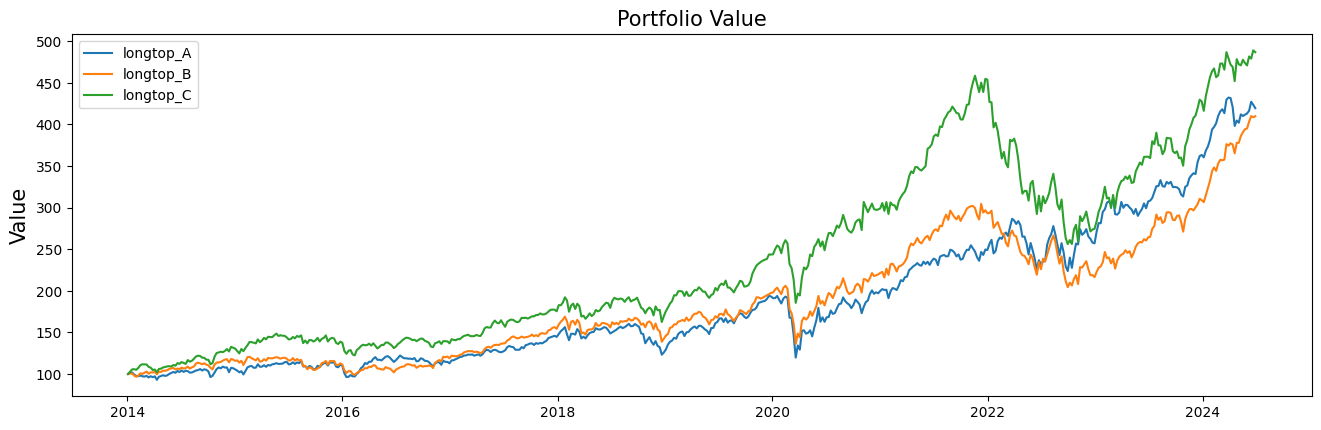

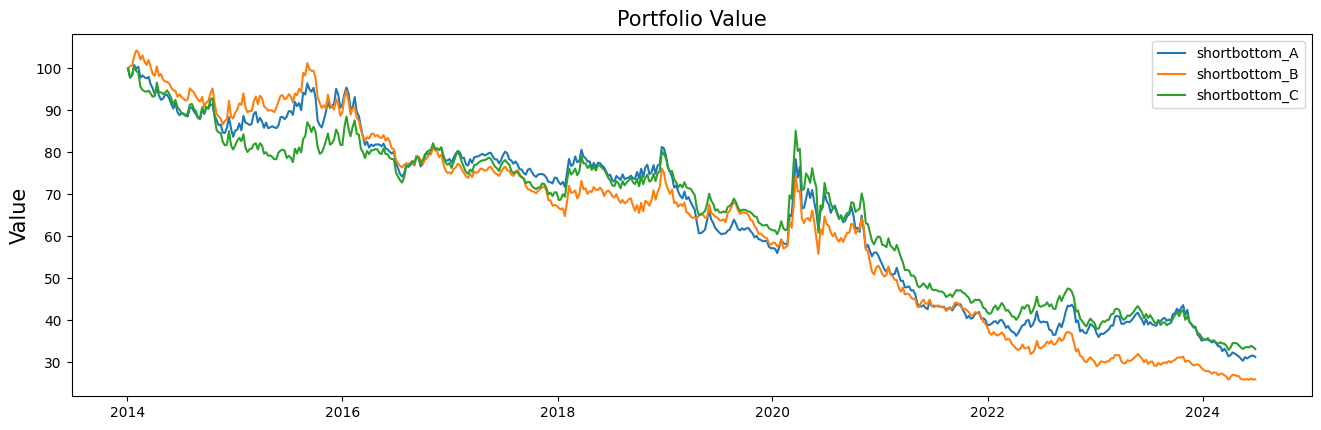

In [15]:
# Compare Values between Top strategies A, B, and C
plt.figure(figsize=(16, 16))
plt.subplot(3,1,1)
plt.title('Portfolio Value',fontsize=15)
plt.ylabel('Value', fontsize = 15)
plt.plot(my_pf_longtop_A, label = 'longtop_A')
plt.plot(my_pf_longtop_B, label = 'longtop_B')
plt.plot(my_pf_longtop_C, label = 'longtop_C')
plt.legend(loc = 'best')
plt.show()

# Compare Values between Bottom strategies A, B, and C
plt.figure(figsize=(16, 16))
plt.subplot(3,1,1)
plt.title('Portfolio Value',fontsize=15)
plt.ylabel('Value', fontsize = 15)
plt.plot(my_pf_shortbottom_A, label = 'shortbottom_A')
plt.plot(my_pf_shortbottom_B, label = 'shortbottom_B')
plt.plot(my_pf_shortbottom_C, label = 'shortbottom_C')
plt.legend(loc = 'best')
plt.show()

### Take sub-strategies for Long-Short
Therefore, for Long-Short a strategy, we take top C for Long and bottom C for Short.  

The reason why the portfolio value dropped when we short-sold the bottom-ranked lists is because the stocks in our sample, the SP500, continued to rise in price during this period regardless of the strategy.  
So, we choose a strategy that minimizes losses of value.

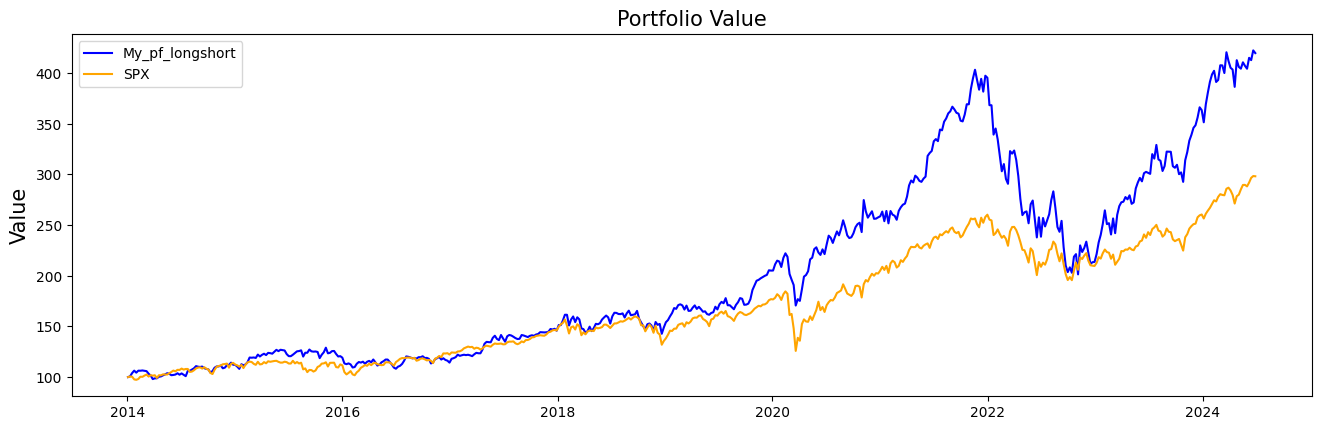

In [23]:
my_pf_longshort, my_result_longshort = backtest_longshort(weekly_price, 'C', 'C',  100, 0.005, 10)
my_pf_longshort.to_excel('my_pf_longshort_values.xlsx')

spx, spx_result = backtest_sp500(weekly_spx, 100, 0.000)
spx.to_excel('spx_values.xlsx')

plt.figure(figsize=(16, 16))
plt.subplot(3,1,1)
plt.title('Portfolio Value',fontsize=15)
plt.ylabel('Value', fontsize = 15)
plt.plot(my_pf_longshort, color = 'blue',label = 'My_pf_longshort')
plt.plot(spx, color = 'orange', label = 'SPX')
plt.legend(loc = 'best')
plt.show()

#Step 6: Performance



In [19]:
dfs = [my_result_longtop_C, my_result_shortbottom_C, my_result_longshort, spx_result]
labels = ['my_pf_longtop_C', 'my_pf_shortbottom_C', 'my_result_longshort', 'spx_result']
combined_df = pd.concat(dfs, keys=labels)
combined_df.to_excel('result_final.xlsx')
combined_df

2014-01-03_To_2024-06-28
my_pf_longtop_C     Cumulative_Return                  3.866601
                    Annual_Return                      0.162813
                    Annunal_Std                        0.203642
                    Annual_Sharpe                      0.799508
my_pf_shortbottom_C Cumulative_Return                 -0.669436
                    Annual_Return                     -0.100144
                    Annunal_Std                        0.168163
                    Annual_Sharpe                     -0.595519
my_result_longshort Cumulative_Return                  3.197164
                    Annual_Return                      0.146525
                    Annunal_Std                        0.210132
                    Annual_Sharpe                      0.697299
spx_resulte         Cumulative_Return                  1.981637
                    Annual_Return                      0.109756
                    Annunal_Std                        0.164702
                    Annual_Sharpe                      0.666393

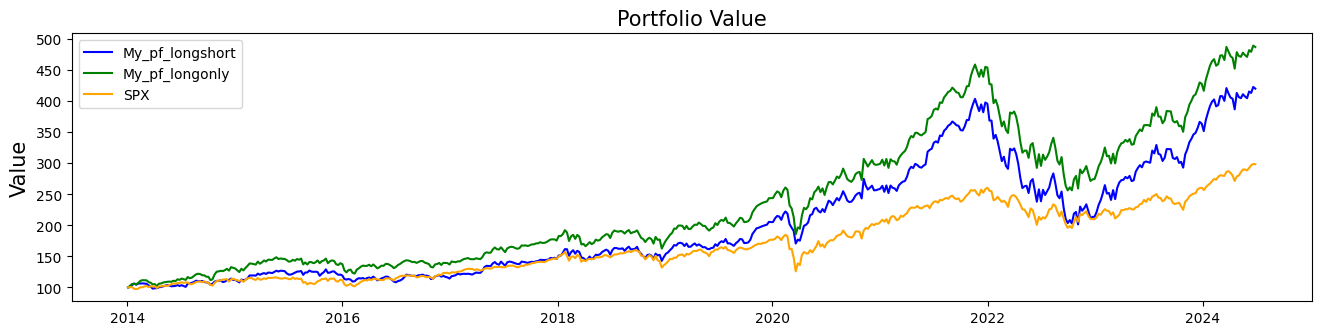

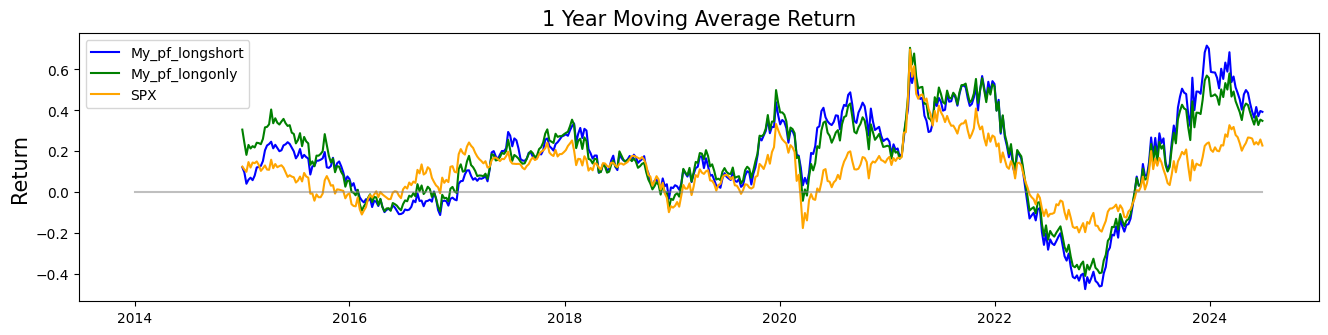

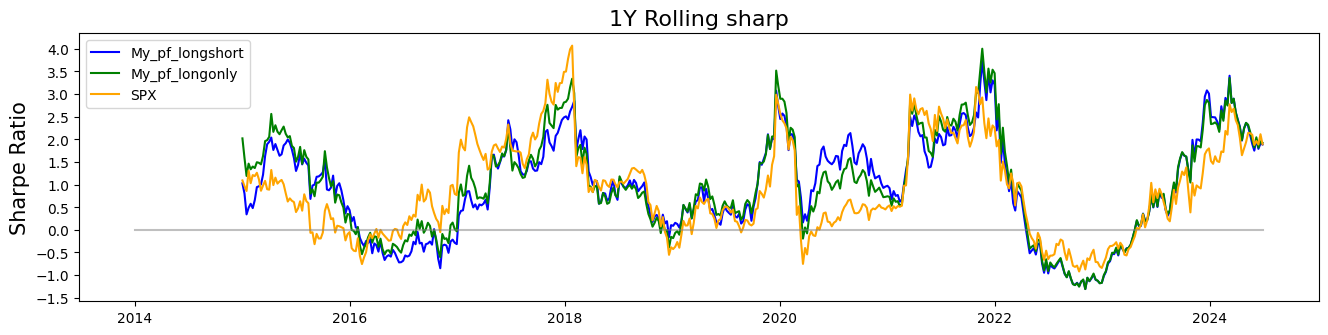

In [25]:
MA_Year = 1
MA_months = 12 * MA_Year
MA_weekly = 52 * MA_Year

weekly_pf_value = my_pf_longshort
weekly_pf_return = weekly_pf_value.pct_change()

weekly_spx_value = spx
weekly_spx_return = weekly_spx_value.pct_change()

my_rolling_sigma = weekly_pf_return.rolling(MA_weekly).std() * np.sqrt(52)
my_rolling_return = ((weekly_pf_value/weekly_pf_value.shift(MA_weekly))) ** (1/MA_Year)-1
my_rolling_sharp = my_rolling_return/my_rolling_sigma

spx_rolling_sigma = weekly_spx_return.rolling(MA_weekly).std() * np.sqrt(52)
spx_rolling_return = ((weekly_spx_value/weekly_spx_value.shift(MA_weekly))) ** (1/MA_Year)-1
spx_rolling_sharp = spx_rolling_return/spx_rolling_sigma

weekly_pf_value2 = my_pf_longtop_C
weekly_pf_return2 = weekly_pf_value2.pct_change()

my_rolling_sigma2 = weekly_pf_return2.rolling(MA_weekly).std() * np.sqrt(52)
my_rolling_return2 = ((weekly_pf_value2/weekly_pf_value2.shift(MA_weekly))) ** (1/MA_Year)-1
my_rolling_sharp2 = my_rolling_return2/my_rolling_sigma2


# Compare Values between longshort and longonlt
plt.figure(figsize=(16, 16))
plt.subplot(4,1,1)
plt.title('Portfolio Value',fontsize=15)
plt.ylabel('Value', fontsize = 15)
plt.plot(my_pf_longshort, color = 'blue',label = 'My_pf_longshort')
plt.plot(my_pf_longtop_C,color = 'green', label = 'My_pf_longonly')
plt.plot(spx, color = 'orange', label = 'SPX')
plt.legend(loc = 'best')
plt.show()

# Compare Moving Average Return
plt.figure(figsize = (16,16))
plt.subplot(4,1,1)
plt.title(str(1) + ' Year Moving Average Return',fontsize=15)
plt.ylabel('Return', fontsize = 15)
plt.plot(my_rolling_return, color = 'blue', label = 'My_pf_longshort')
plt.plot(my_rolling_return2, color = 'green', label = 'My_pf_longonly')
plt.plot(spx_rolling_return, color = 'orange',label = 'SPX')
plt.plot(pd.Series([0]*len(my_rolling_return), index = my_rolling_return.index),color = 'grey' ,alpha = 0.5 )
plt.legend(loc = 'best')
plt.show()

# Compare Moving Sharpe Ratio
plt.figure(figsize = (16,16))
plt.subplot(4,1,1)
plt.title(str(MA_Year)+'Y Rolling sharp', fontsize= 16)
plt.ylabel('Sharpe Ratio', fontsize = 15)
plt.yticks(np.arange(-2,5,0.5))
plt.plot(my_rolling_sharp ,color = 'blue', label = 'My_pf_longshort')
plt.plot(my_rolling_sharp2 ,color = 'green', label = 'My_pf_longonly')
plt.plot(spx_rolling_sharp, color = 'orange', label = 'SPX')
plt.plot(pd.Series([0]*len(my_rolling_sharp), index = my_rolling_sharp.index),color = 'grey' ,alpha = 0.5 )
plt.legend(loc = 'best')
plt.show()

# Step7: Retriction and Conclusion (To be Confirmed)

Adding more data could change the results.  

Although the short strategy didn't work properly, even just looking at the long strategy, we can see that the companies which chose stock repurchases over cash dividends experienced significant growth in value.  

However, despite this, the value of the portfolio plummeted due to factors such as the U.S. interest rate hikes and tightening monetary policy in 2022, the Russia-Ukraine war, and overvaluation of tech stocks.
(For the companies we selected, refer to the strat_result_longshort_CC.xlsx file)  